<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°04

## Objetivos del laboratorio

* Reforzar conceptos básicos de reducción de dimensionalidad.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:


1. Normalizar para las columnas numéricas con procesamiento **StandardScaler**.
2. Realice un gráfico de correlación. Identifique la existencia de colinealidad.
3. Realizar un ajuste PCA con **n_components = 10**. Realice un gráfico de la varianza y varianza acumulada. Interprete.
4. Devuelva un dataframe con las componentes principales.
5. Aplique al menos tres modelos de clasificación. Para cada modelo, calule el valor de sus métricas.

# pregunta 1

In [3]:
df_idless=df.drop(['id'],axis=1) ## remuevo el id ya que no le veo el sentido a normalizar esta columna.
df_scaler=StandardScaler().fit_transform(df_idless) 
n_df=pd.DataFrame(df_scaler,columns = df_idless.columns)
n_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.297676,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.297676,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,1.297676,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.297676,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


# Pregunta 2

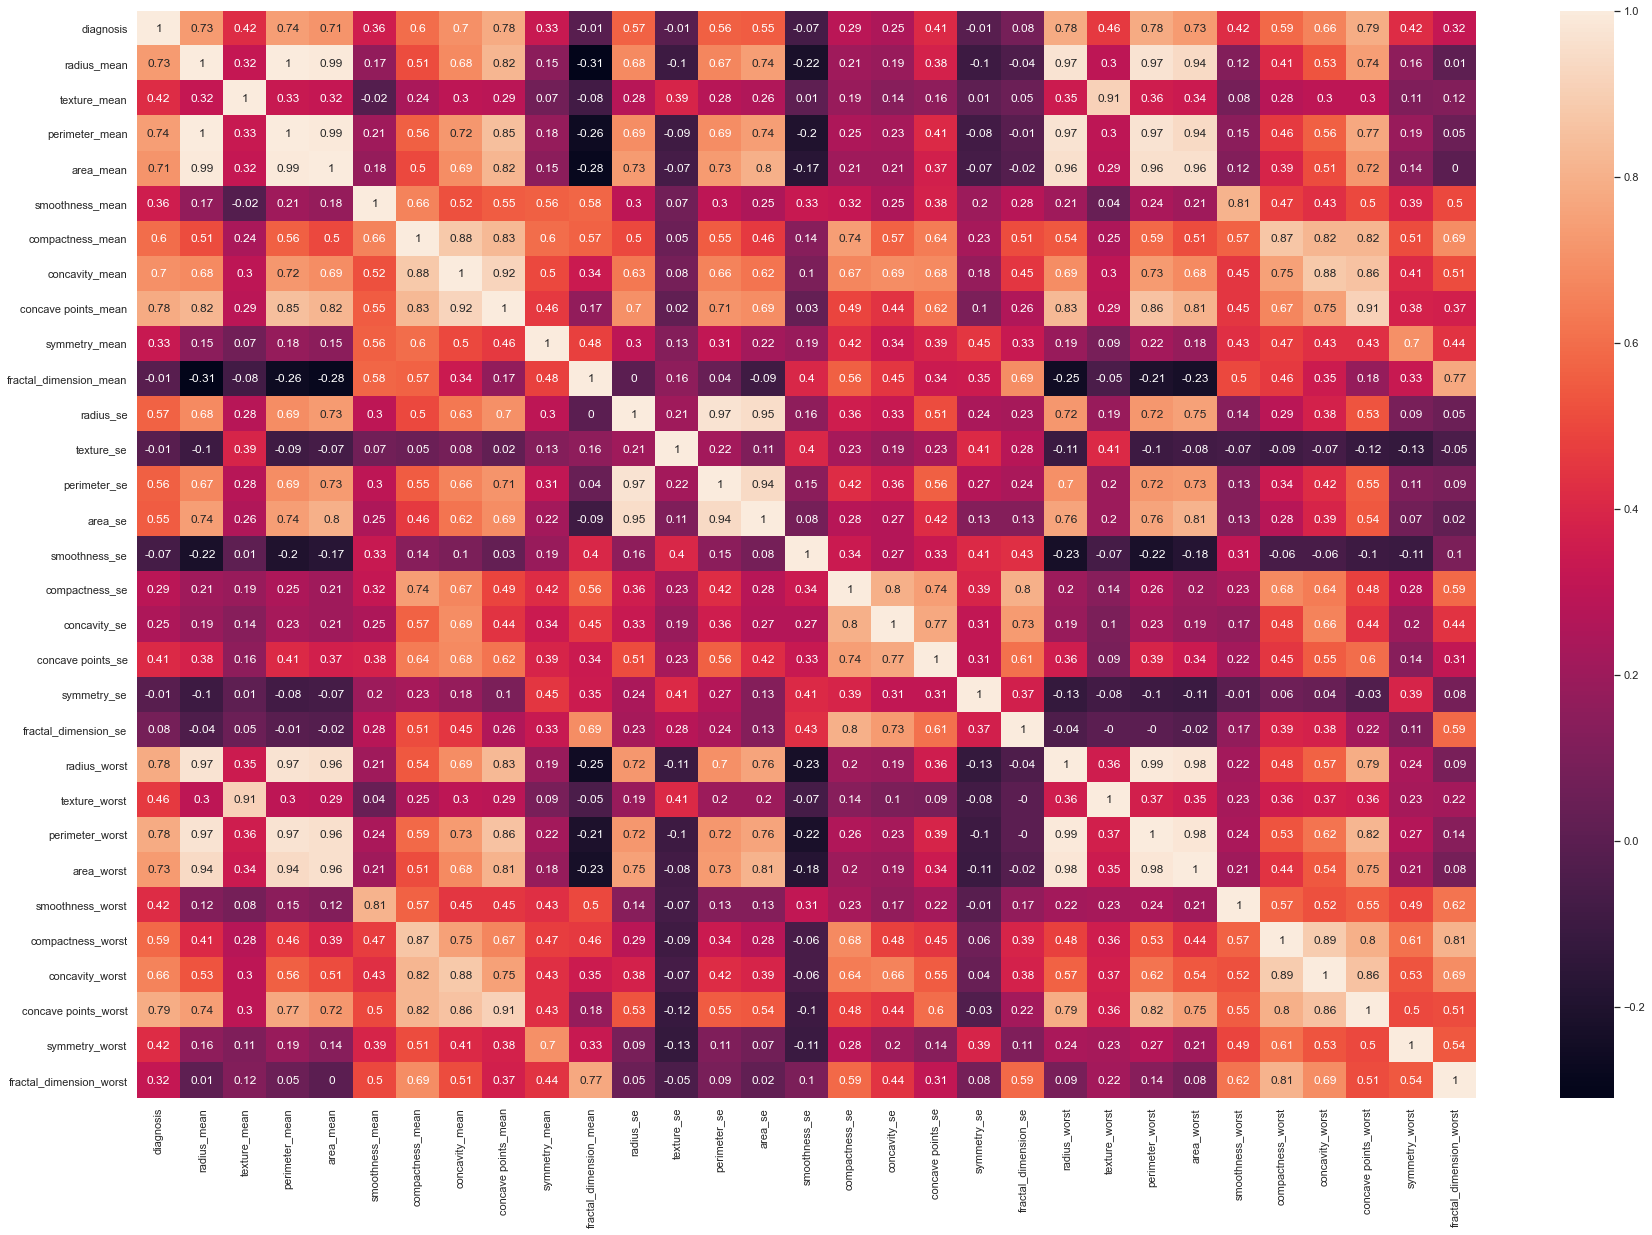

In [4]:
figure = plt.figure(figsize=(30,20))
sns.heatmap(n_df.corr().round(2), annot = True, fmt="g")
plt.show()

# Pregunta 3

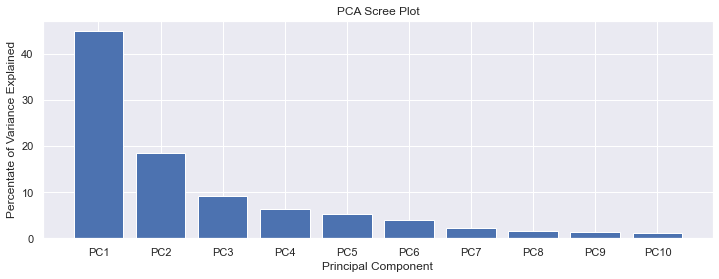

In [5]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(n_df.values)

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

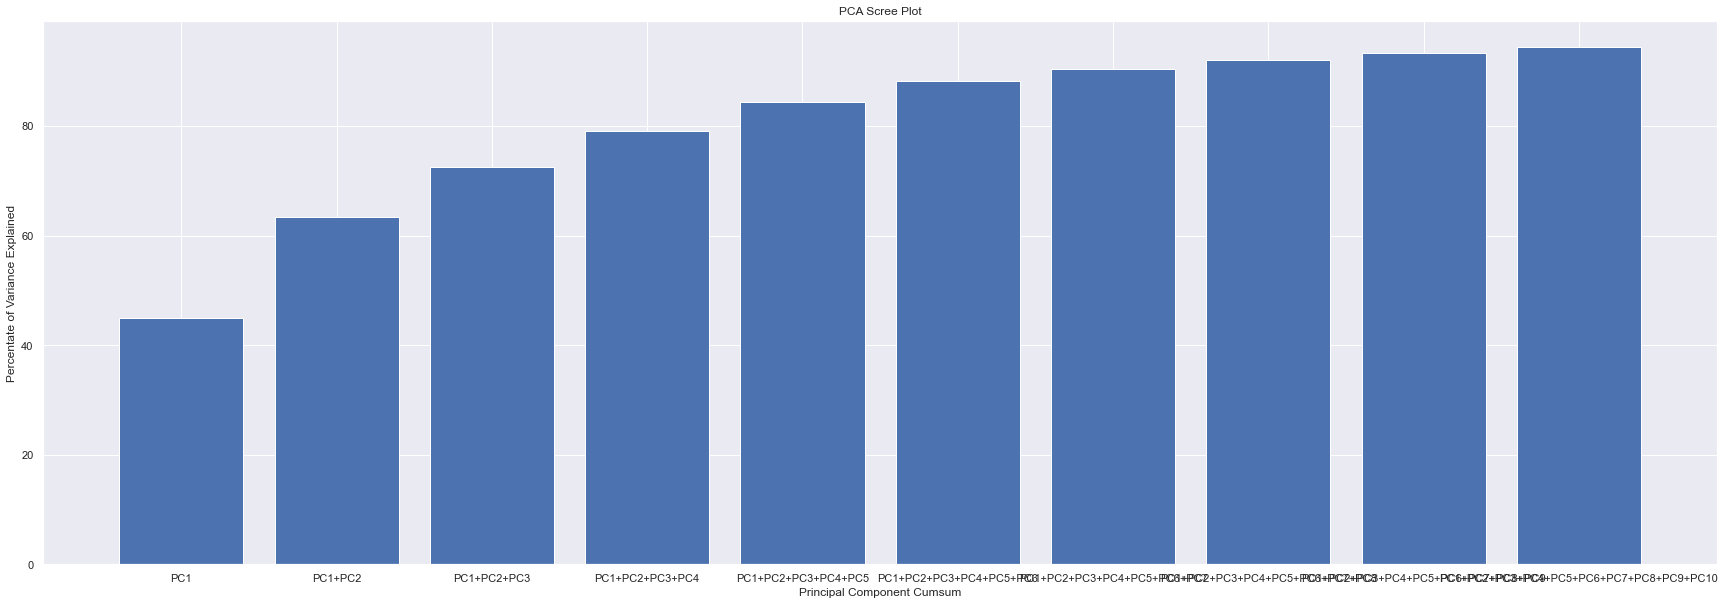

In [6]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = []
for i in range(1, 11):
  if i == 1:
    columns.append(f'PC{i}')
  else:
    columns.append(columns[-1] + f'+PC{i}')
columns

plt.figure(figsize=(30,10))
plt.bar(x= range(1,11), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

# Pregunta 4

In [7]:
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
principalDataframe

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.225770,2.116196,-0.948109,-3.695778,-1.256280,1.419117,2.194975,-0.315738,-0.156934,-0.889454
1,2.655802,-3.784776,-0.502825,-1.123938,0.551107,0.019272,-0.099646,0.385278,-0.711690,1.049255
2,5.892492,-1.005579,-0.487149,-0.942486,-0.191711,0.541332,-0.660971,0.058982,0.023986,0.456586
3,7.135401,10.318716,-3.339501,-0.085947,-2.938456,3.062747,1.380732,1.150397,-1.405513,-1.123210
4,4.129423,-1.905579,1.454000,-2.880175,0.365289,-1.243428,-1.073154,0.717656,-0.263754,0.354954
...,...,...,...,...,...,...,...,...,...,...
564,6.593983,-3.454947,2.570876,-1.152905,-0.129841,-2.377277,-0.586579,-0.065757,0.987898,0.256772
565,4.024833,-3.556006,2.047373,2.568539,-0.434088,-0.243029,-0.670490,-1.121367,-0.104981,-0.128850
566,1.530077,-1.958871,0.465718,2.104481,1.820113,-0.546015,-0.317641,0.460616,0.394034,0.495902
567,10.405008,1.849078,-1.779328,2.163463,0.201609,0.591631,0.461155,-0.552549,-0.542460,-0.004005


# Pregunta 5

In [9]:
#importo metricas para todos los modelos
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score


def some_metrics(y_train,y_test):
    """
    summary metrics: Aplica las distintas metricas definidas
    -----------
    parameters:
    y_train: conjunto de datos de entrenamiendo
    y_test: conjunto de datos de datos de prueba
    -----------
    return:
    dataframe con las metricas confusion_matrix, accuracy_score, recall_score, precision_score, f1_score.
    """
    print('\nMetricas:\n ')
    print('accuracy:   ',accuracy_score(y_train, y_test))
    print('recall:     ',recall_score(y_train, y_test))
    print('precision:  ',precision_score(y_train, y_test))
    print('f-score:    ',f1_score(y_train, y_test))
    
    print('\nMatriz de confusion:\n ')
    print(confusion_matrix(y_train,y_test))

    print("")


    return 

In [11]:
df_diag=df['diagnosis']

In [12]:
#Entrenamiento del modelo
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(principalDataframe, df_diag, test_size=0.35, 
                                                    train_size=0.65,
                                                    random_state=1982)

In [14]:
#Modelo de Regresión logística
from sklearn.linear_model import LogisticRegression


# Creando el modelo
lr = LogisticRegression(solver='liblinear').fit(x_train, y_train)
 
# predecir
lr_pred = lr.predict(x_test)

summary_metrics(y_test, lr_pred)


Matriz de confusion:
 
[[115   1]
 [  4  80]]

Metricas:
 
accuracy:    0.975
recall:      0.9523809523809523
precision:   0.9876543209876543
f-score:     0.9696969696969696



In [16]:
#Modelo de Arbol de clasificación
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
dt_pred = model.predict(x_test)

summary_metrics(y_test, dt_pred)


Matriz de confusion:
 
[[113   3]
 [  6  78]]

Metricas:
 
accuracy:    0.975
recall:      0.9523809523809523
precision:   0.9876543209876543
f-score:     0.9696969696969696



In [17]:
#Modelo SVC

from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train, y_train)
svc_pred = svc_model.predict(x_test)

summary_metrics(y_test, svc_pred)


Matriz de confusion:
 
[[116   0]
 [  4  80]]

Metricas:
 
accuracy:    0.975
recall:      0.9523809523809523
precision:   0.9876543209876543
f-score:     0.9696969696969696

